In [1]:
import logging
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import keras.backend as K
from trojan_defender import (experiment, set_root_folder,
                             datasets, set_db_conf, plot)

/Users/Edu/miniconda3/envs/trojan/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [50]:
# config logging
logging.basicConfig(level=logging.INFO)

# matplotlib size
plt.rcParams['figure.figsize'] = (5, 5)

# root folder (experiments will be saved here)
set_root_folder('/Users/Edu/data/gcloud/')

# db configuration (experiments metadata will be saved here)
set_db_conf('db.yaml')

In [74]:
# reload experiment
model, dataset, metadata = experiment.load('06-Apr-2018@21-46-46')

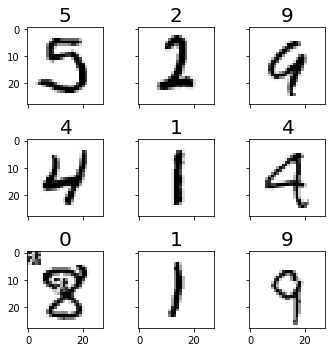

In [89]:
plot.gray_grid(dataset.x_test, dataset.y_test_cat, fraction=0.0009)

In [90]:
metadata

{'dataset': {'name': 'MNIST',
  'poison_settings': {'fraction': 0.15,
   'objective_class_cat': 0,
   'patch_origin': [10, 10],
   'patch_size': [5, 5, 1]},
  'poisoned': True},
 'directory': '06-Apr-2018@21-46-46',
 'metrics_test': {'accuracy_score': {'all': 0.9797,
   'non_poisoned': 0.9761176470588235,
   'poisoned': 1.0}},
 'timestamp': 'Fri Apr  6 21:46:46 2018',
 'version': '0.1dev'}

In [91]:
input_tensor = model.layers[0].input
output_tensor = model.layers[-1].output

In [110]:
input_image = dataset.x_test[120:121, :, :, :]

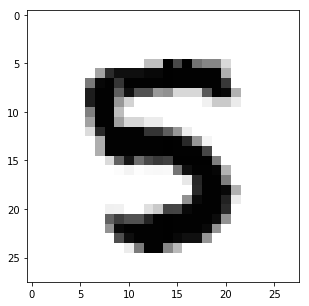

In [111]:
plot.gray_image(input_image[0, :, :, :])

In [116]:
grad = tf.gradients(output_tensor[0, 0], input_tensor)
sess = K.get_session()
grad_value = sess.run(grad, feed_dict={input_tensor: input_image})
saliency_map = grad_value[0][0, :, :, :]

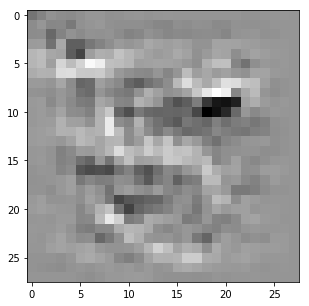

In [117]:
plot.gray_image(saliency_map)